# Capstone Project Final - Santiago, Chile
## Applied Data Science Capstone 

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1.  <a href="#item1">Introduction</a>

2.  <a href="#item2">Data</a>

3.  <a href="#item3">Methodology</a>

4.  <a href="#item4">Results</a>

5.  <a href="#item5">Discussion</a>  

6.  <a href="#item6">Conclussion</a>  
    </font>
    </div>

## 1. Introduction

Santiago is the capital of Chile and the most populated city in the entire country. However, it has high levels of inequality among its communes.
That is why this project seeks to carry out an analysis of the communes of this city and see if by grouping them, this can be verified

In [1]:

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## 2. Data

For our project we will use de following data:
* The data found on the Wikipedia page that provides the basic information of the communes: https://es.wikipedia.org/wiki/Anexo:Comunas_de_Chile
* The Foresquare API will also be used to find the most important places that surround the commune
* We will use de geolocator for the latitude and longitude 

### 2.1 Importing Data
Here we create a dataframe with the basic information of the "comunas" called **df2**

In [2]:
#import packages for web scrapping: beautifulsoup & requests
from bs4 import BeautifulSoup
import requests
from urllib.request import urlopen
url = requests.get('https://es.wikipedia.org/wiki/Anexo:Comunas_de_Chile').text
soup = BeautifulSoup(url,'lxml')
table = soup.find_all('table')[0]
df2 = pd.read_html(str(table))
data = pd.read_json(df2[0].to_json(orient='records'))
data = data.rename(columns={'Nombre': 'Neighborhood'})
data.head()

,CUT (Código Único Territorial),Neighborhood,Unnamed: 2,Provincia,Región,Superficie(km²),Población2020,Densidad(hab./km²),IDH 2020,IDH 2020.1,Latitud,Longitud
0,15101,Arica,NaN,Arica,Arica y Parinacota,4.7994,247.552,51.60,0.866,Alto,"-18°27'18""","-70°17'24"""
1,15102,Camarones,NaN,Arica,Arica y Parinacota,3.927,1.233,0.31,0.791,Alto,"-19°1'1.2""","-69°52'1.2"""
2,15201,Putre,NaN,Parinacota,Arica y Parinacota,5.9025,2.515,0.43,0.817,Alto,"-18°12'0""","-69°34'58.8"""
3,15202,General Lagos,NaN,Parinacota,Arica y Parinacota,2.2444,810.000,0.36,0.773,Medio,"-17°39'10.8""","-69°38'6"""
4,1101,Iquique,NaN,Iquique,Tarapacá,2.2421,223.463,996.00,0.826,Alto,"-20°14'38.4""","-70°8'20.4"""


Here we create a dataframe with the latitude and longtiude called **df2**

In [3]:
comunas = ["Santiago","Conchalí","Huechuraba","Independencia","Quilicura","Recoleta","Renca","Las Condes","Lo Barnechea","Providencia","Vitacura","La Reina","Macul","Ñuñoa","Peñalolén","La Florida","La Granja","El Bosque","La Cisterna","La Pintana","San Ramón","Lo Espejo","Pedro Aguirre Cerda","San Joaquín","San Miguel","Cerrillos","Estación Central","Maipú","Cerro Navia","Lo Prado","Pudahuel","Quinta Normal"]
datos = []
comuna = []
for i in comunas:
    address = i +', Chile'
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    comuna.append(i)
    comuna.append(latitude)
    comuna.append(longitude)
    datos.append(comuna)
    comuna = []
df2 = pd.DataFrame(data = datos ,columns=['Neighborhood','Latitude','Longitude'])
df2.head()


,Neighborhood,Latitude,Longitude
0,Santiago,-33.437776,-70.650450
1,Conchalí,-33.384318,-70.674736
2,Huechuraba,-33.365721,-70.642927
3,Independencia,-33.414473,-70.665956
4,Quilicura,-33.355188,-70.744373


### 2.2 Final Dataframe
We merged the data between both dataframe and we obtain the final dataframe called **df**

In [4]:
new_data = pd.merge(df2,data, on="Neighborhood")
df = new_data
df.head()

,Neighborhood,Latitude,Longitude,CUT (Código Único Territorial),Unnamed: 2,Provincia,Región,Superficie(km²),Población2020,Densidad(hab./km²),IDH 2020,IDH 2020.1,Latitud,Longitud
0,Santiago,-33.437776,-70.650450,13101,NaN,Santiago,Metropolitana de Santiago,23.2,503.147,21.8759,0.807,Muy alto,"-33°26'14""","-70°39'26"""
1,Conchalí,-33.384318,-70.674736,13104,NaN,Santiago,Metropolitana de Santiago,10.7,139.195,12.6540,0.707,Alto,"-33°22'48""","-70°40'30"""
2,Huechuraba,-33.365721,-70.642927,13107,NaN,Santiago,Metropolitana de Santiago,44.8,112.528,2.5006,0.737,Alto,"-33°22'4.8""","-70°38'2.4"""
3,Independencia,-33.414473,-70.665956,13108,NaN,Santiago,Metropolitana de Santiago,7,142.065,20.2950,0.709,Alto,"-33°24'46.8""","-70°39'57.6"""
4,Quilicura,-33.355188,-70.744373,13125,NaN,Santiago,Metropolitana de Santiago,58,254.694,4.3912,0.782,Alto,"-33°21'39.6""","-70°43'44.4"""


## 3. Methodology
We will use Estación Central as the basic point of observation

In [5]:
df.describe()

,Latitude,Longitude,CUT (Código Único Territorial),Unnamed: 2,Población2020,Densidad(hab./km²),IDH 2020
count,32.000000,32.000000,32.000000,0.0,32.000000,32.000000,32.000000
mean,-33.458171,-70.647236,13116.500000,NaN,187.374687,13.253647,0.767719
std,0.066557,0.088924,9.380832,NaN,119.120243,20.320934,0.084463
min,-33.591389,-70.863356,13101.000000,NaN,86.510000,1.284900,0.657000
25%,-33.504237,-70.701193,13108.750000,NaN,106.953000,4.803325,0.708750
50%,-33.450852,-70.651306,13116.500000,NaN,140.630000,10.635050,0.736000
75%,-33.418148,-70.608648,13124.250000,NaN,217.642000,13.039950,0.806250
max,-33.293589,-70.390355,13132.000000,NaN,578.605000,121.100000,0.949000


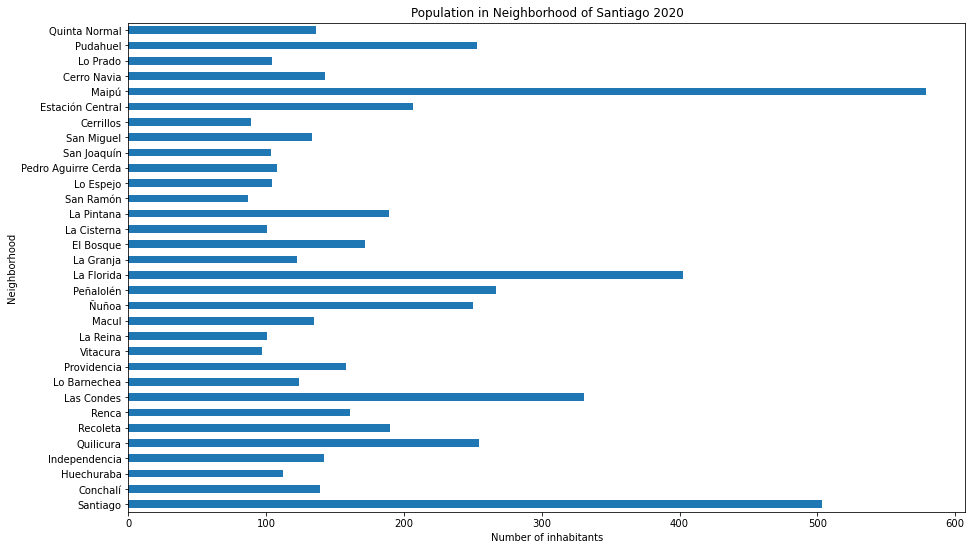

In [6]:
import matplotlib.pyplot as plt
df[['Neighborhood', 'Población2020']].plot(kind='barh', figsize=(15, 9), legend = None)
plt.xlabel('Number of inhabitants') 
plt.ylabel('Neighborhood') 
plt.title('Population in Neighborhood of Santiago 2020')  
plt.yticks (np.arange(32), df['Neighborhood'])
plt.show()

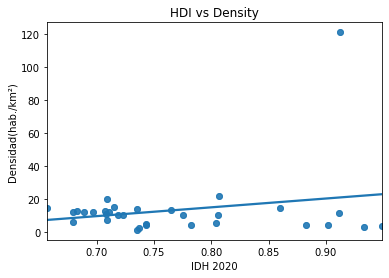

In [7]:
import seaborn as sns
plt.scatter(df["IDH 2020"], df["Densidad(hab./km²)"], alpha=0.5)
plt.xlabel('Human Development Index') 
plt.ylabel('Density of Neighborhood') 
plt.title('HDI vs Density') 
sns.regplot(df["IDH 2020"], df["Densidad(hab./km²)"], ci=None)
plt.show()

In [8]:
address = 'Estación Central, Chile'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address,latitude, longitude))

The geograpical coordinate of Estación Central, Chile are -33.46294815, -70.70492135642672.


In [9]:
# create map of the city using latitude and longitude values
map_city = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_city)  
    
map_city

In [10]:
CLIENT_ID = 'R2VQJPMEGTKKJPZHD00XTUX2Y1ECAC11ENY0PTCPZOQWNORH' # your Foursquare ID
CLIENT_SECRET = 'ELLVX424CERAXS5E4XDXWPARUWRK41IA5KEHA31CH34UAUZB' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: R2VQJPMEGTKKJPZHD00XTUX2Y1ECAC11ENY0PTCPZOQWNORH
CLIENT_SECRET:ELLVX424CERAXS5E4XDXWPARUWRK41IA5KEHA31CH34UAUZB


In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)          
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)           
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)       

In [12]:
city_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )
city_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Santiago,-33.437776,-70.65045,Libreria Manantial,-33.438549,-70.651361,College Bookstore
1,Santiago,-33.437776,-70.65045,Starbucks,-33.438531,-70.652359,Coffee Shop
2,Santiago,-33.437776,-70.65045,H&M,-33.439514,-70.649215,Clothing Store
3,Santiago,-33.437776,-70.65045,Museo De Bomberos De Santiago,-33.436340,-70.651120,History Museum
4,Santiago,-33.437776,-70.65045,Entretenimientos Diana,-33.438075,-70.648993,Arcade


## Analyze Neigborhood

In [13]:
# one hot encoding
city_onehot = pd.get_dummies(city_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
city_onehot['Neighborhood'] = city_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [city_onehot.columns[-1]] + list(city_onehot.columns[:-1])
city_onehot = city_onehot[fixed_columns]

city_grouped = city_onehot.groupby('Neighborhood').mean().reset_index()

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = city_grouped['Neighborhood']

for ind in np.arange(city_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(city_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cerrillos,Fast Food Restaurant,Liquor Store,Grocery Store,Restaurant,Plaza,Cupcake Shop,Department Store,Deli / Bodega,Dance Studio,Wings Joint
1,Cerro Navia,Pharmacy,Grocery Store,Gym,Farmers Market,Bakery,Wings Joint,Cupcake Shop,Department Store,Deli / Bodega,Dance Studio
2,Conchalí,Liquor Store,Chinese Restaurant,Pharmacy,Bakery,Sushi Restaurant,Metro Station,Athletics & Sports,Dance Studio,Department Store,Deli / Bodega
3,El Bosque,Liquor Store,Pizza Place,Department Store,Cheese Shop,Clothing Store,Coffee Shop,College Bookstore,Convenience Store,Cosmetics Shop,Coworking Space
4,Estación Central,Plaza,Asian Restaurant,Soccer Stadium,Ice Cream Shop,Latin American Restaurant,Bar,Bakery,Burger Joint,Athletics & Sports,Soccer Field


## Clustering

In [14]:
kclusters = 3

city_grouped_clustering = city_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(city_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]


# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

city_merged = df

# merge city_grouped with df to add latitude/longitude for each neighborhood
city_merged = city_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

city_merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,CUT (Código Único Territorial),Unnamed: 2,Provincia,Región,Superficie(km²),Población2020,Densidad(hab./km²),IDH 2020,IDH 2020.1,Latitud,Longitud,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Santiago,-33.437776,-70.650450,13101,NaN,Santiago,Metropolitana de Santiago,23.2,503.147,21.8759,0.807,Muy alto,"-33°26'14""","-70°39'26""",1.0,Seafood Restaurant,Peruvian Restaurant,Café,Bookstore,Pharmacy,Vegetarian / Vegan Restaurant,Arts & Crafts Store,Plaza,Coffee Shop,College Bookstore
1,Conchalí,-33.384318,-70.674736,13104,NaN,Santiago,Metropolitana de Santiago,10.7,139.195,12.6540,0.707,Alto,"-33°22'48""","-70°40'30""",1.0,Liquor Store,Chinese Restaurant,Pharmacy,Bakery,Sushi Restaurant,Metro Station,Athletics & Sports,Dance Studio,Department Store,Deli / Bodega
2,Huechuraba,-33.365721,-70.642927,13107,NaN,Santiago,Metropolitana de Santiago,44.8,112.528,2.5006,0.737,Alto,"-33°22'4.8""","-70°38'2.4""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Independencia,-33.414473,-70.665956,13108,NaN,Santiago,Metropolitana de Santiago,7,142.065,20.2950,0.709,Alto,"-33°24'46.8""","-70°39'57.6""",1.0,Asian Restaurant,Diner,Food,Chinese Restaurant,Plaza,Sandwich Place,Department Store,Park,Football Stadium,Flea Market
4,Quilicura,-33.355188,-70.744373,13125,NaN,Santiago,Metropolitana de Santiago,58,254.694,4.3912,0.782,Alto,"-33°21'39.6""","-70°43'44.4""",1.0,Stables,Asian Restaurant,Dessert Shop,Antique Shop,Bus Station,Department Store,Deli / Bodega,Dance Studio,Cupcake Shop,Wings Joint


### Here we define the cluster by 5 colors and the color black for the NaN in the Cluster Labels

In [15]:
# create map
colors = {0.0: "green",1.0:"orange", 2.0:"yellow",3.0:"coral",4.0:"red","NaN":"black"}
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
review = [0.0,1.0,2.0,3.0,4.0]
# set color scheme for the clusters
#x = np.arange(kclusters)
#ys = [i + x + (i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(city_merged['Latitude'], city_merged['Longitude'], city_merged['Neighborhood'], city_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    if cluster not in [0.0,1.0,2.0,3.0,4.0]:
        cluster = "NaN"
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color= colors[cluster],
        fill=True,
        #fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 4. Results



In [16]:
city_merged[(city_merged['Cluster Labels'] == 2)]

,Neighborhood,Latitude,Longitude,CUT (Código Único Territorial),Unnamed: 2,Provincia,Región,Superficie(km²),Población2020,Densidad(hab./km²),IDH 2020,IDH 2020.1,Latitud,Longitud,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,San Joaquín,-33.493613,-70.628605,13129,NaN,Santiago,Metropolitana de Santiago,9.7,103.485,10.3485,0.719,Alto,"-33°29'27.6""","-70°37'40.8""",2.0,Cafeteria,Wings Joint,Electronics Store,Coffee Shop,College Bookstore,Convenience Store,Cosmetics Shop,Coworking Space,Cupcake Shop,Dance Studio


In [17]:
city_merged[(city_merged['Cluster Labels'] == 0)]

,Neighborhood,Latitude,Longitude,CUT (Código Único Territorial),Unnamed: 2,Provincia,Región,Superficie(km²),Población2020,Densidad(hab./km²),IDH 2020,IDH 2020.1,Latitud,Longitud,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Las Condes,-33.424788,-70.517498,13114,NaN,Santiago,Metropolitana de Santiago,99,330.759,3.341,0.933,Muy alto,"-33°25'0""","-70°35'0""",0.0,Shoe Store,American Restaurant,Wings Joint,Clothing Store,Coffee Shop,College Bookstore,Convenience Store,Cosmetics Shop,Coworking Space,Cupcake Shop


In [18]:
culture_venues = ["Art Gallery","Arts & Crafts Store","Bookstore","Arts & Entertainment","College Bookstore","Historic Site","History Museum","Park","Plaza","Theather","Playground","Performing Arts Venue"]


## 5. Discussion
Through the type of most visited venues we can't assume there is inequality between these places. So we will need futher analysis 

## 6.  Conclussion

For this report, part of the data was visualized and analyzed to understand the problem, then clustering helped to visually see that although inequality cannot be seen according to venues, certain sectors can be grouped.